## Modified National Institute of Standards and Technology database (MNIST) contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9. Perform Clustering of MNIST dataset using CNN & K-means

In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

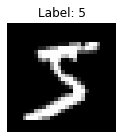

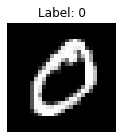

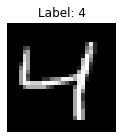

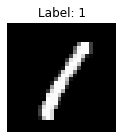

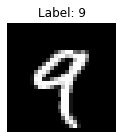

In [3]:
# Printing sample data images
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()

In [4]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Expand dimensions to fit into the CNN model
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [5]:
# Define CNN model
def build_cnn(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax') # 10 clusters for MNIST
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
cnn_model = build_cnn(input_shape=x_train[0].shape)

In [7]:
!pip install pydot
!pip install graphviz

In [8]:
from keras.utils import plot_model
import pydotplus

plot_model(cnn_model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
cnn_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 23s 48ms/step - loss: 0.3056 - accuracy: 0.9079 - val_loss: 0.0649 - val_accuracy: 0.9793
Epoch 2/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0999 - accuracy: 0.9706 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 3/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0722 - accuracy: 0.9786 - val_loss: 0.0335 - val_accuracy: 0.9891
Epoch 4/5
469/469 [==============================] - 23s 48ms/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0307 - val_accuracy: 0.9884
Epoch 5/5
469/469 [==============================] - 21s 44ms/step - loss: 0.0510 - accuracy: 0.9849 - val_loss: 0.0300 - val_accuracy: 0.9899


In [10]:
# Extract features using CNN model
feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)
features_train = feature_extractor.predict(x_train)
features_test = feature_extractor.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [11]:
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(features_train)

KMeans(n_clusters=10, random_state=42)

In [12]:
# Predict clusters for test data
cluster_labels = kmeans.predict(features_test)

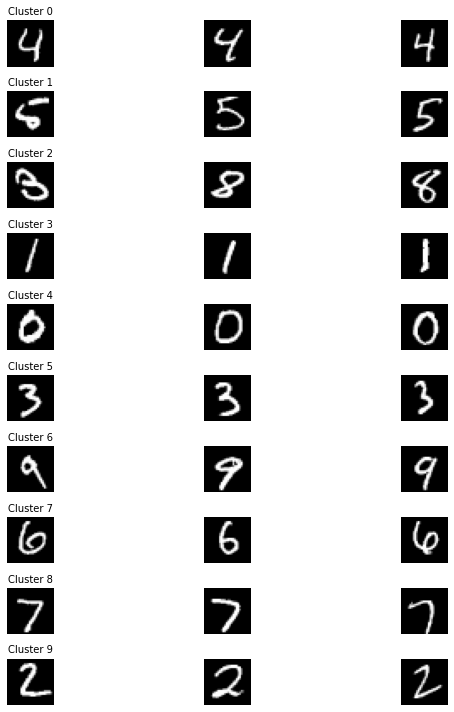

In [13]:
plt.figure(figsize=(10, 10))
for cluster_id in range(10):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    # Select three images from the current cluster
    cluster_images = x_test[cluster_indices[:3]]
    
    # Plot the images
    for i in range(3):
        plt.subplot(10, 3, cluster_id*3 + i + 1)
        plt.imshow(cluster_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f'Cluster {cluster_id}', fontsize=10)
    
# Show the plot
plt.tight_layout()
plt.show()